## Importing req libraries

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import scipy 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
pd.__version__, np.__version__, scipy.__version__

('1.4.4', '1.26.4', '1.13.1')

In [ ]:
sns.set_theme()
pal = sns.set_palette([
    "#FF6347", "#4682B4", "#8A2BE2", "#FFD700", "#32CD32",
    "#FF4500", "#1E90FF", "#FF1493", "#00FA9A", "#FFDAB9",
    "#6A5ACD", "#FF8C00", "#ADFF2F", "#20B2AA", "#FF69B4",
    "#7B68EE", "#FFB6C1", "#00BFFF", "#F08080", "#DDA0DD"
])

pd.set_option('display.max_columns', 33)
pd.set_option('display.max_rows', 50)

## EDA (EXPLORATORY DATA ANALYSIS)

### Dataset Retrieval

In [20]:
data = pd.read_csv('../data/student-por.csv', sep=';')

print((f'Data Size : {data.shape[0]}'))

data.head()

Data Size : 649


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [18]:
data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

### NA check

In [26]:
data.isna().sum().sort_values(ascending=False)

school        0
paid          0
G2            0
G1            0
absences      0
health        0
Walc          0
Dalc          0
goout         0
freetime      0
famrel        0
romantic      0
internet      0
higher        0
nursery       0
activities    0
famsup        0
sex           0
schoolsup     0
failures      0
studytime     0
traveltime    0
guardian      0
reason        0
Fjob          0
Mjob          0
Fedu          0
Medu          0
Pstatus       0
famsize       0
address       0
age           0
G3            0
dtype: int64

### Breaking down and examining data types

In [22]:
numerical_data = data.select_dtypes(include=['float64', 'int64'])

numerical_data.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

### Heatmap as the best way to detect correlations 

In [ ]:
corrs = numerical_data.corr()

Text(0.5, 1.01, 'Correlation of all numerical valriables')

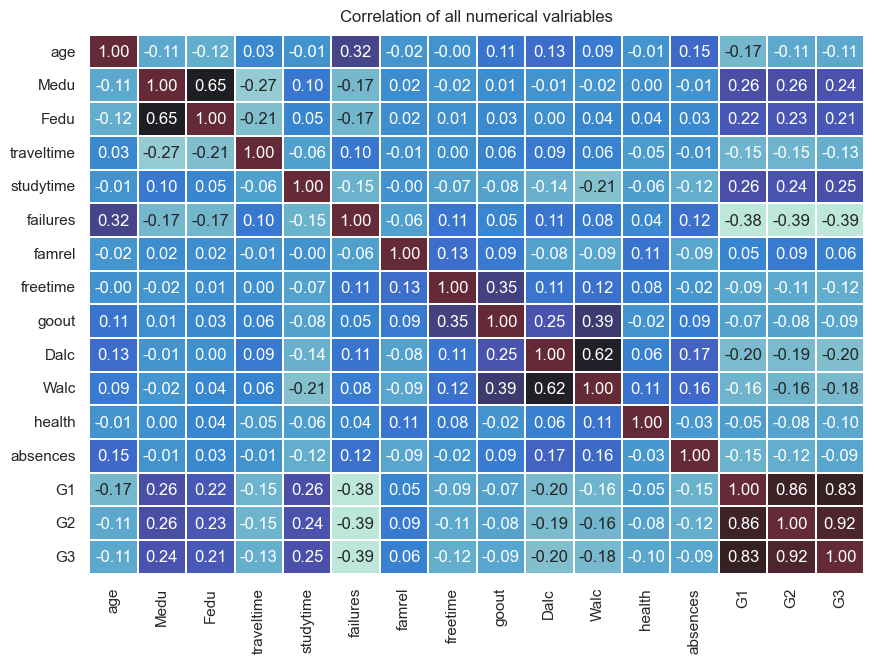

In [60]:
fig, ax = plt.subplots(figsize=(10, 7))   
ax = sns.heatmap(data=corrs, annot=True, linewidths=.2, center=0.7, fmt='.2f', cbar=False)
ax.set_title('Correlation of all numerical valriables', y=1.01)